In [1]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

generator =ImageDataGenerator(rescale=1/255, validation_split=.25)

train_generator= generator.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='training', class_mode='binary')
validation_set=generator.flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', subset='validation', class_mode='binary')
test_generator = generator.flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=32, color_mode='grayscale', class_mode='binary')

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 3913 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
train_images.shape

(32, 64, 64, 1)

In [4]:
def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_precision = results.history['precision']
    val_precision = results.history['val_precision']
    train_accuracy = results.history['binary_accuracy']
    val_accuracy = results.history['val_binary_accuracy']

    # Setting up plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    #Plotting precision
    ax2.set_title("Precision")
    sns.lineplot(x=results.epoch, y=train_precision, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_precision, ax=ax2, label=val_label)
    ax2.legend()
    
    # Plotting accuracy info
    ax3.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax3, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax3, label=val_label)
    ax3.legend()

Epoch 1/10
123/123 [==============================] - 61s 496ms/step - loss: 0.6912 - precision: 0.7450 - binary_accuracy: 0.7255 - val_loss: 0.6686 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 2/10
123/123 [==============================] - 60s 492ms/step - loss: 0.6575 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6471 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 3/10
123/123 [==============================] - 61s 495ms/step - loss: 0.6380 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6295 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 4/10
123/123 [==============================] - 62s 506ms/step - loss: 0.6223 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6154 - val_precision: 0.7429 - val_binary_accuracy: 0.7429
Epoch 5/10
123/123 [==============================] - 60s 488ms/step - loss: 0.6096 - precision: 0.7429 - binary_accuracy: 0.7429 - val_loss: 0.6040 - val_precision: 0.7429 - val_binary_ac

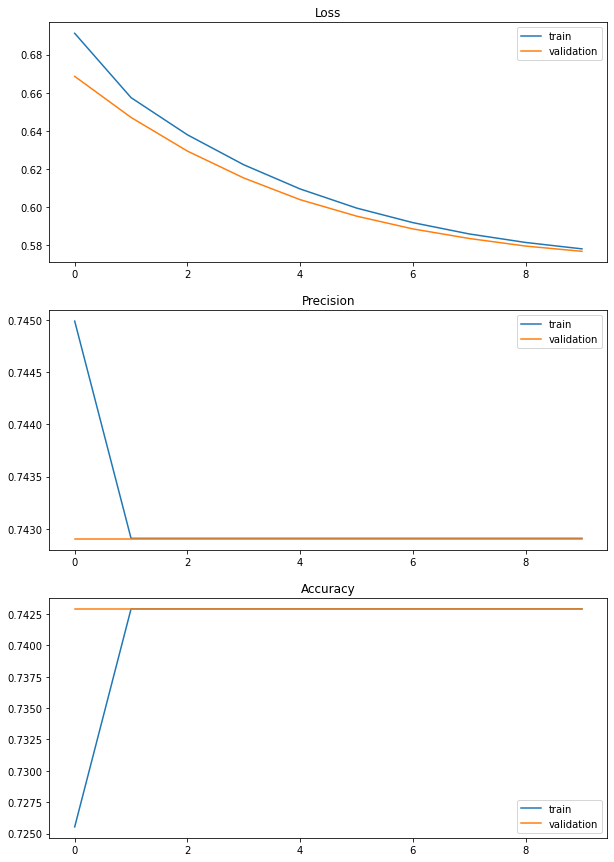

In [5]:
simple_model = models.Sequential()
simple_model.add(layers.Flatten())
simple_model.add(Dense(12, activation='relu'))
simple_model.add(Dense(1, activation='sigmoid'))

simple_model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])
                 
results = simple_model.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_and_accuracy(results)

Epoch 1/10
123/123 [==============================] - 68s 549ms/step - loss: 0.2655 - precision: 0.9048 - binary_accuracy: 0.8896 - val_loss: 0.1379 - val_precision: 0.9545 - val_binary_accuracy: 0.9478
Epoch 2/10
123/123 [==============================] - 66s 533ms/step - loss: 0.1017 - precision: 0.9740 - binary_accuracy: 0.9647 - val_loss: 0.1216 - val_precision: 0.9501 - val_binary_accuracy: 0.9501
Epoch 3/10
123/123 [==============================] - 64s 519ms/step - loss: 0.0759 - precision: 0.9788 - binary_accuracy: 0.9734 - val_loss: 0.1565 - val_precision: 0.9933 - val_binary_accuracy: 0.9371
Epoch 4/10
123/123 [==============================] - 63s 515ms/step - loss: 0.0635 - precision: 0.9815 - binary_accuracy: 0.9773 - val_loss: 0.1232 - val_precision: 0.9851 - val_binary_accuracy: 0.9547
Epoch 5/10
123/123 [==============================] - 64s 517ms/step - loss: 0.0505 - precision: 0.9876 - binary_accuracy: 0.9821 - val_loss: 0.1052 - val_precision: 0.9852 - val_binary_ac

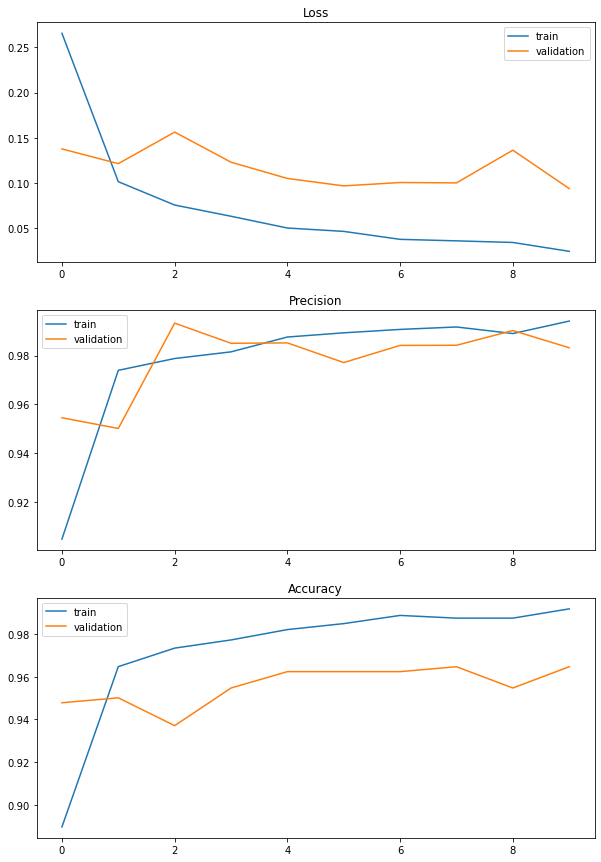

In [8]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])

results2 = model2.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_and_accuracy(results2)

Epoch 1/10
123/123 [==============================] - 65s 528ms/step - loss: 0.2544 - precision: 0.9065 - binary_accuracy: 0.8952 - val_loss: 0.1533 - val_precision: 0.9787 - val_binary_accuracy: 0.9478
Epoch 2/10
123/123 [==============================] - 63s 516ms/step - loss: 0.1089 - precision: 0.9703 - binary_accuracy: 0.9614 - val_loss: 0.1505 - val_precision: 0.9923 - val_binary_accuracy: 0.9463
Epoch 3/10
123/123 [==============================] - 65s 526ms/step - loss: 0.0936 - precision: 0.9734 - binary_accuracy: 0.9660 - val_loss: 0.1116 - val_precision: 0.9568 - val_binary_accuracy: 0.9555
Epoch 4/10
123/123 [==============================] - 64s 523ms/step - loss: 0.0625 - precision: 0.9832 - binary_accuracy: 0.9780 - val_loss: 0.1726 - val_precision: 0.9944 - val_binary_accuracy: 0.9332
Epoch 5/10
123/123 [==============================] - 65s 526ms/step - loss: 0.0540 - precision: 0.9849 - binary_accuracy: 0.9798 - val_loss: 0.1550 - val_precision: 0.9956 - val_binary_ac

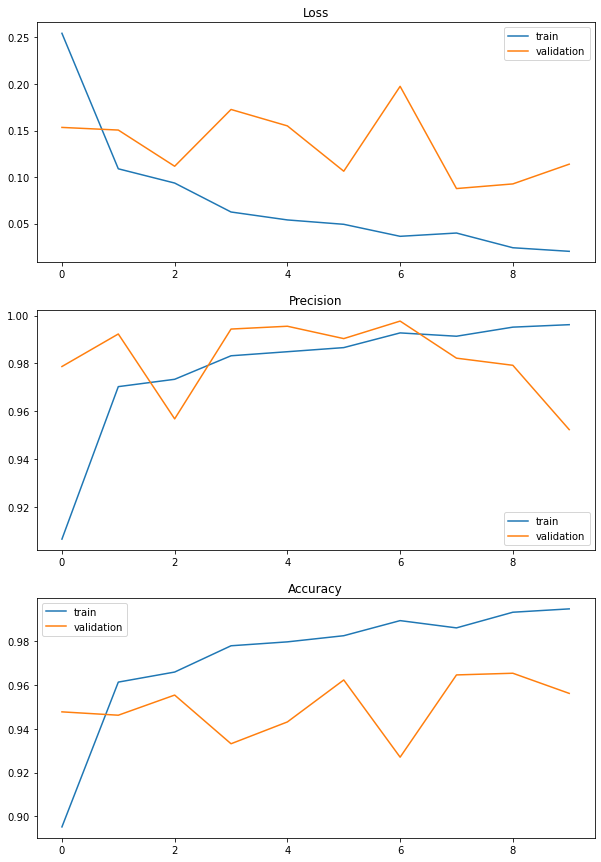

In [13]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
                           verbose=1, patience=3,
                           mode='auto')
checkpoint = ModelCheckpoint('../data/localdata/chest_xray/BestCNNModel', monitor='val_loss',
    save_best_only= True)

results3 = model3.fit(train_generator, epochs=10, validation_data=validation_set,
                    callbacks=[early_stop, checkpoint])
plot_loss_and_accuracy(results3)

Epoch 1/10
123/123 [==============================] - 68s 554ms/step - loss: 0.3202 - precision: 0.8718 - binary_accuracy: 0.8694 - val_loss: 0.1981 - val_precision: 0.9820 - val_binary_accuracy: 0.9163
Epoch 2/10
123/123 [==============================] - 68s 554ms/step - loss: 0.1212 - precision: 0.9658 - binary_accuracy: 0.9525 - val_loss: 0.1378 - val_precision: 0.9797 - val_binary_accuracy: 0.9470
Epoch 3/10
123/123 [==============================] - 67s 548ms/step - loss: 0.0898 - precision: 0.9746 - binary_accuracy: 0.9640 - val_loss: 0.1264 - val_precision: 0.9881 - val_binary_accuracy: 0.9501
Epoch 4/10
123/123 [==============================] - 68s 551ms/step - loss: 0.0799 - precision: 0.9811 - binary_accuracy: 0.9719 - val_loss: 0.1067 - val_precision: 0.9811 - val_binary_accuracy: 0.9616
Epoch 5/10
123/123 [==============================] - 69s 558ms/step - loss: 0.0725 - precision: 0.9801 - binary_accuracy: 0.9711 - val_loss: 0.1044 - val_precision: 0.9801 - val_binary_ac

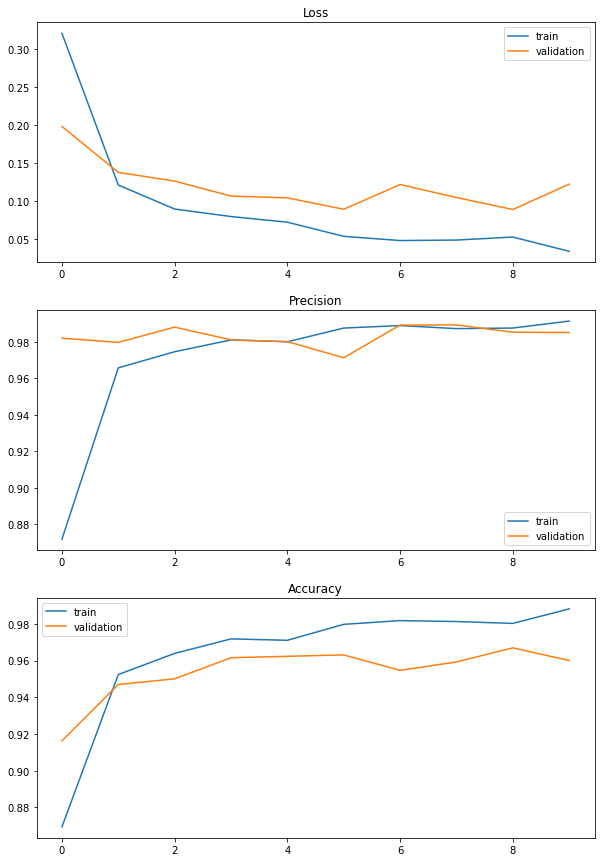

In [12]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(64, 64, 1)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])
results4 = model4.fit(train_generator, epochs=10, validation_data=validation_set)
plot_loss_and_accuracy(results4)